In [3]:
# pip install nibabel

In [27]:
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [1]:
! ls

import_fMRI_image.ipynb
subj02


In [9]:
behavior = pd.read_csv("subj02/behavior/subj02.csv")
print(behavior.columns)
behavior.head()

Index(['CC', 'DC', 'CD', 'DD', 'game_ix', 'game_repetition', 'game_nb',
       'period', 'order_resp_you', 'order_resp_other', 'run', 'tim_max_RT',
       'tim_feedback', 'tim_jitter', 'trial_duration', 'side_resp',
       'chosen_opt', 'choice', 'rt', 'fmri', 'id', 'subj_pair', 'onset_trial',
       'onset_response', 'onset_feedback', 'onset_ITI', 'age', 'gender',
       'nationality', 'language', 'marital', 'religion', 'studies',
       'community', 'money', 'family_wealth', 'politics', 'code', 'g', 'l',
       'gl', 'risk', 'spe', 'ineq', 'roth', 'risk2', 'soc', 'ba', 'alpha',
       'rho', 'belief', 'beta', 'LL', 'UC', 'UD', 'UD_rn', 'UD_sn', 'UC_rn',
       'UC_sn', 'D1', 'D_rn', 'D_sn', 'PC1', 'PC_rn', 'PC_sn', 'risk_factor',
       'social_factor', 'CD_coef', 'CC_coef', 'DC_coef', 'DD_coef',
       'risk_coef'],
      dtype='object')


,CC,DC,CD,DD,game_ix,game_repetition,game_nb,period,order_resp_you,order_resp_other,...,PC1,PC_rn,PC_sn,risk_factor,social_factor,CD_coef,CC_coef,DC_coef,DD_coef,risk_coef
0,20,25,0,10,15,1,15,1,1,1,...,0.528751,0.507281,0.298255,0.426145,-0.594848,0.007666,0.087998,-0.059209,-0.035593,1.4441
1,30,40,0,10,22,1,22,2,1,1,...,0.519060,0.505589,0.152888,0.313606,1.351352,0.007666,0.087998,-0.059209,-0.035593,1.4441
2,25,30,5,15,44,1,44,3,1,1,...,0.529182,0.507281,0.278631,0.432204,-0.307174,0.007666,0.087998,-0.059209,-0.035593,1.4441
3,25,35,10,15,52,1,52,4,1,2,...,0.390512,0.468621,0.170038,-0.974704,-0.738610,0.007666,0.087998,-0.059209,-0.035593,1.4441
4,25,35,0,10,19,1,19,5,2,1,...,0.465191,0.489329,0.162075,-0.215471,0.446839,0.007666,0.087998,-0.059209,-0.035593,1.4441


In [85]:
behavior["game_nb"]

0      15
1      22
2      44
3      52
4      19
       ..
186    79
187    46
188    11
189    43
190    42
Name: game_nb, Length: 191, dtype: int64

In [14]:
behavior["choice"].value_counts()

1    96
0    95
Name: choice, dtype: int64

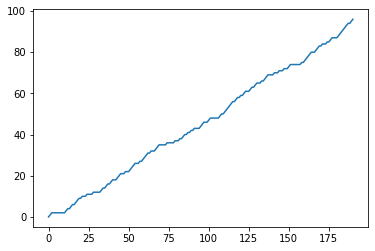

In [17]:
ts = behavior["choice"].cumsum()
plt.plot(ts)
plt.show()

## Data read

In [28]:
ipath = "subj02/preproc_img_MVPA_norm_smooth"
runs = os.listdir(ipath)

In [94]:
beta = "1stLevel_nob0_MVPA_trial_smooth"
betap = "subj02/"+beta

In [95]:
! ls $betap

RPV.nii
ResMS.nii
SPM.mat
beta_0001.nii
beta_0002.nii
beta_0003.nii
beta_0004.nii
beta_0005.nii
beta_0006.nii
beta_0007.nii
beta_0008.nii
beta_0009.nii
beta_0010.nii
beta_0011.nii
beta_0012.nii
beta_0013.nii
beta_0014.nii
beta_0015.nii
beta_0016.nii
beta_0017.nii
beta_0018.nii
beta_0019.nii
beta_0020.nii
beta_0021.nii
beta_0022.nii
beta_0023.nii
beta_0024.nii
beta_0025.nii
beta_0026.nii
beta_0027.nii
beta_0028.nii
beta_0029.nii
beta_0030.nii
beta_0031.nii
beta_0032.nii
beta_0033.nii
beta_0034.nii
beta_0035.nii
beta_0036.nii
beta_0037.nii
beta_0038.nii
beta_0039.nii
beta_0040.nii
beta_0041.nii
beta_0042.nii
beta_0043.nii
beta_0044.nii
beta_0045.nii
beta_0046.nii
beta_0047.nii
beta_0048.nii
beta_0049.nii
beta_0050.nii
beta_0051.nii
beta_0052.nii
beta_0053.nii
beta_0054.nii
beta_0055.nii
beta_0056.nii
beta_0057.nii
beta_0058.nii
beta_0059.nii
beta_0060.nii
beta_0061.nii
beta_0062.nii
beta_0063.nii
beta_0064.nii
beta_0065.nii
beta_0066.nii
beta_0067.nii
beta_0068.nii
beta_0069.nii
beta_007

In [98]:
beta = pd.read_csv(betap+"/"+"beta_names.csv")
beta.head()

,Var1
0,Sn(1) choice_tr1_defect_R+S-*bf(1)
1,Sn(1) choice_tr2_cooperate_R+S+*bf(1)
2,Sn(1) choice_tr3_cooperate_R+S-*bf(1)
3,Sn(1) choice_tr4_defect_R-S-*bf(1)
4,Sn(1) choice_tr5_defect_R-S+*bf(1)


In [107]:
betas = ["beta_"+str(i).zfill(4) +".nii" for i in range(1,220)]
beta["var2"] = betas

In [111]:
beta.tail(20)

,Var1,var2
199,Sn(4) choice_tr39_cooperate_R+S-*bf(1),beta_0200.nii
200,Sn(4) choice_tr40_cooperate_R-S-*bf(1),beta_0201.nii
201,Sn(4) choice_tr41_cooperate_R-S-*bf(1),beta_0202.nii
202,Sn(4) choice_tr42_cooperate_R+S+*bf(1),beta_0203.nii
203,Sn(4) choice_tr43_cooperate_R+S+*bf(1),beta_0204.nii
204,Sn(4) choice_tr44_cooperate_R+S+*bf(1),beta_0205.nii
205,Sn(4) choice_tr45_cooperate_R+S+*bf(1),beta_0206.nii
206,Sn(4) choice_tr46_defect_R+S+*bf(1),beta_0207.nii
207,Sn(4) choice_tr47_cooperate_R-S-*bf(1),beta_0208.nii
208,Sn(4) choice_tr48_cooperate_R-S-*bf(1),beta_0209.nii


In [115]:

len("Sn(1) constant")

14

In [116]:
len(beta.loc[1,"Var1"])

37

In [117]:
beta["len"] = beta["Var1"].apply(len)

<AxesSubplot:>

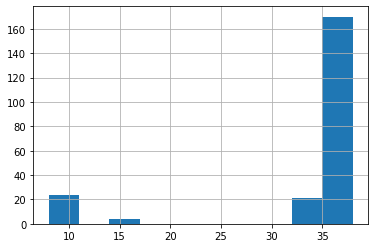

In [119]:
beta["len"].hist()

In [120]:
beta_clean = beta.query("len > 20")

In [122]:
beta_clean.head()

,Var1,var2,len
0,Sn(1) choice_tr1_defect_R+S-*bf(1),beta_0001.nii,34
1,Sn(1) choice_tr2_cooperate_R+S+*bf(1),beta_0002.nii,37
2,Sn(1) choice_tr3_cooperate_R+S-*bf(1),beta_0003.nii,37
3,Sn(1) choice_tr4_defect_R-S-*bf(1),beta_0004.nii,34
4,Sn(1) choice_tr5_defect_R-S+*bf(1),beta_0005.nii,34


In [130]:
splits = beta_clean["Var1"].str.split("_",expand=True)

In [135]:
df = beta_clean.join(splits)
df.head()

,Var1,var2,len,0,1,2,3
0,Sn(1) choice_tr1_defect_R+S-*bf(1),beta_0001.nii,34,Sn(1) choice,tr1,defect,R+S-*bf(1)
1,Sn(1) choice_tr2_cooperate_R+S+*bf(1),beta_0002.nii,37,Sn(1) choice,tr2,cooperate,R+S+*bf(1)
2,Sn(1) choice_tr3_cooperate_R+S-*bf(1),beta_0003.nii,37,Sn(1) choice,tr3,cooperate,R+S-*bf(1)
3,Sn(1) choice_tr4_defect_R-S-*bf(1),beta_0004.nii,34,Sn(1) choice,tr4,defect,R-S-*bf(1)
4,Sn(1) choice_tr5_defect_R-S+*bf(1),beta_0005.nii,34,Sn(1) choice,tr5,defect,R-S+*bf(1)


In [138]:
df["labels"] = df[2].map({"defect":0, "cooperate":1})

In [147]:
df = df.rename(columns={"var2":"files"})

In [148]:
df.head()

,Var1,files,len,0,1,2,3,labels
0,Sn(1) choice_tr1_defect_R+S-*bf(1),beta_0001.nii,34,Sn(1) choice,tr1,defect,R+S-*bf(1),0
1,Sn(1) choice_tr2_cooperate_R+S+*bf(1),beta_0002.nii,37,Sn(1) choice,tr2,cooperate,R+S+*bf(1),1
2,Sn(1) choice_tr3_cooperate_R+S-*bf(1),beta_0003.nii,37,Sn(1) choice,tr3,cooperate,R+S-*bf(1),1
3,Sn(1) choice_tr4_defect_R-S-*bf(1),beta_0004.nii,34,Sn(1) choice,tr4,defect,R-S-*bf(1),0
4,Sn(1) choice_tr5_defect_R-S+*bf(1),beta_0005.nii,34,Sn(1) choice,tr5,defect,R-S+*bf(1),0


In [174]:
betap

'subj02/1stLevel_nob0_MVPA_trial_smooth'

In [166]:
im = nib.load(betap+"/beta_0010.nii")
bdat = im.get_fdata()

In [167]:
bdat.shape

(80, 80, 40)

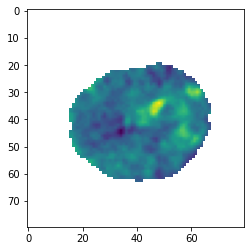

In [173]:
plt.imshow(bdat[:,:,20])

### EDA

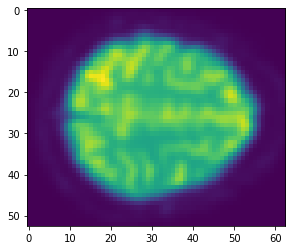

In [149]:
plt.imshow(data[:,:,40,2])

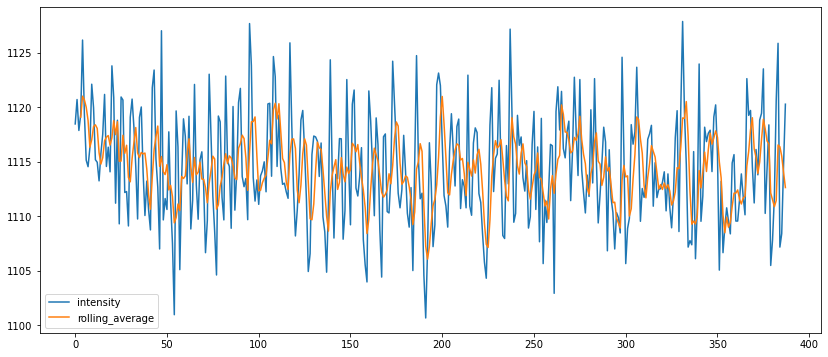

In [66]:
# Plotting mean intensity of a region of the brain over all timepoints
ts_mean = [data[20:30,20:30,30,i].mean() for i in range(data.shape[-1])]
plt.figure(figsize=(14,6))
plt.plot(ts_mean, label="intensity")
plt.plot(pd.Series(ts_mean).rolling(4).mean(), label="rolling_average")
plt.legend()
plt.show()

## 3D classification

In [193]:
from mpl_toolkits.mplot3d import Axes3D
 


x=range(data.shape[0])
y=range(data.shape[1])
z=range(data.shape[2])

x

range(0, 53)

TypeError: scatter() missing 2 required positional arguments: 'xs' and 'ys'

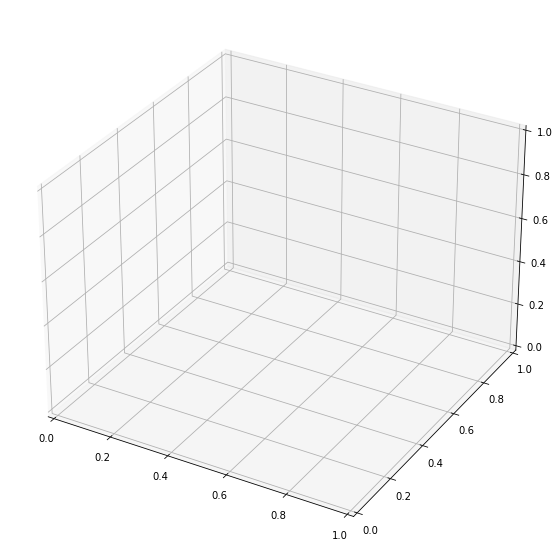

In [195]:
# Change the Size of Graph using
# Figsize
fig = plt.figure(figsize=(10, 10))
 
# Generating a 3D sine wave
ax = plt.axes(projection='3d')
 
# Creating array points using
# numpy
# To create a scatter graph
ax.scatter(x=x, y=y, z=z, c=x)

# trun off/on axis
plt.axis('off')
 
# show the graph
plt.show()

In [190]:
bdat.shape

(80, 80, 40)

In [177]:
# pip install keras
# pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [183]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [184]:
def get_model(width=80, height=80, depth=40):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=256, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=512, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=1, activation="sigmoid")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model


# Build model.
model = get_model(width=80, height=80, depth=40)
model.summary()


ValueError: Exception encountered when calling layer "max_pooling3d_3" (type MaxPooling3D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling3d_3/MaxPool3D}} = MaxPool3D[T=DT_FLOAT, data_format="NDHWC", ksize=[1, 2, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 2, 1]](Placeholder)' with input shapes: [?,6,6,1,256].

Call arguments received:
  • inputs=tf.Tensor(shape=(None, 6, 6, 1, 256), dtype=float32)

## PyTorch 3D

In [175]:
pip install pytorch3d

Note: you may need to restart the kernel to use updated packages.
